## **Create a model that will predict whether or not a user will click on an advertisement based off of the features of that user.**

Kaggle Dataset Source: https://www.kaggle.com/fayomi/advertising

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Extract data

data = pd.read_csv("advertising.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


**Exploratory Data Analysis**

**Check for Missing Values:**

In [4]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

**Visualize Target Variable:**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


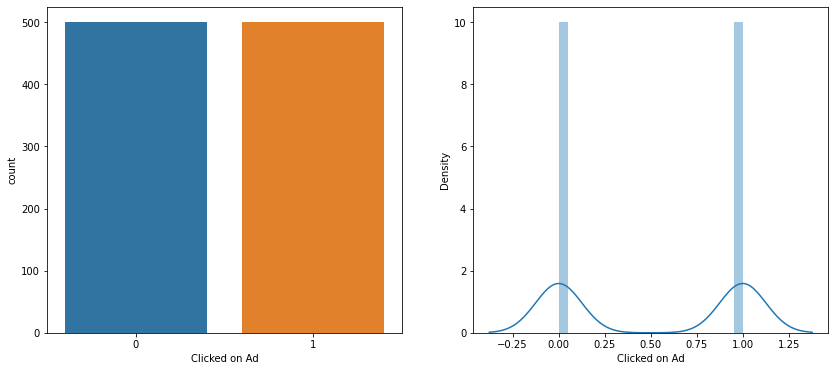

In [5]:
plt.figure(figsize = (14, 6)) 
plt.subplot(1,2,1)            
sns.countplot(x = 'Clicked on Ad', data = data)
plt.subplot(1,2,2)
sns.distplot(data["Clicked on Ad"], bins = 20)
plt.show()

***From the plot we can see that the number of users who click on a ad and who do not are equal in numbers being 500 each***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


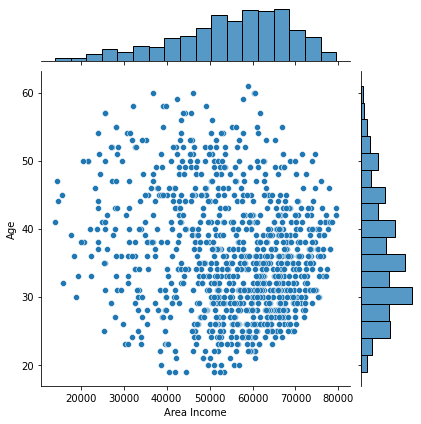

In [6]:
sns.jointplot(data["Area Income"], data.Age)

***We can see that in the dataset there most people are aged between 30 to 40 and have an area income of $50k-$65k***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


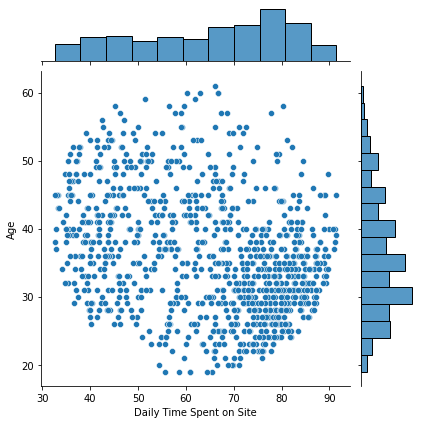

In [7]:
sns.jointplot(data["Daily Time Spent on Site"], data.Age)

***We can see that more people aged between 30 to 40 are spending more time on site daily.***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


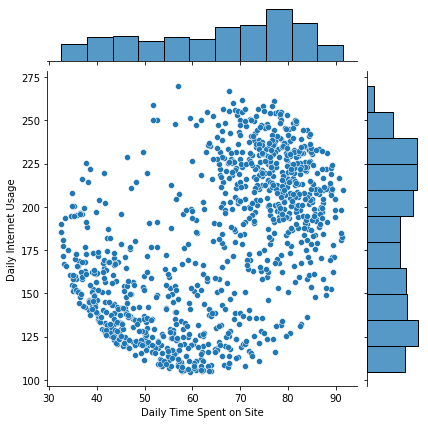

In [8]:
sns.jointplot(data["Daily Time Spent on Site"], data["Daily Internet Usage"])

***People who have a daily internet usage of 200-225 have spent about 70 to 85 on the website***

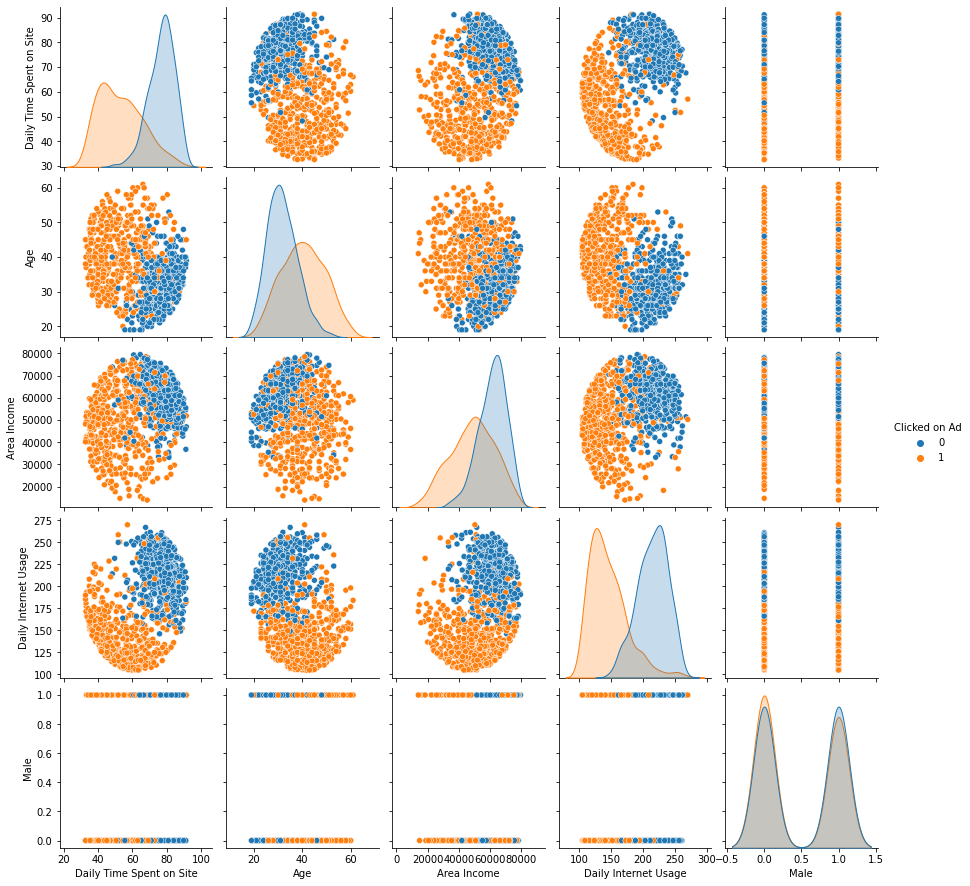

In [9]:
sns.pairplot(data, hue='Clicked on Ad')

***We can see that people who spend less time on site and have less income and are aged more relatively are tend to click on ad.***

**Extracting Datetime Variables**

Utilizing timestamp feature to better understand the pattern when a user is clicking on a ad.

In [18]:
# Extract datetime variables using timestamp column
data['Timestamp'] = pd.to_datetime(data['Timestamp']) 
# Converting timestamp column into datatime object in order to extract new features
data['Month'] = data['Timestamp'].dt.month 
# Creates a new column called Month
data['Day'] = data['Timestamp'].dt.day     
# Creates a new column called Day
data['Hour'] = data['Timestamp'].dt.hour   
# Creates a new column called Hour
data["Weekday"] = data['Timestamp'].dt.dayofweek 
# Creates a new column called Weekday with sunday as 6 and monday as 0
# Other way to create a weekday column
#data['weekday'] = data['Timestamp'].apply(lambda x: x.weekday()) # Monday 0 .. sunday 6
# Dropping timestamp column to avoid redundancy
data = data.drop(['Timestamp'], axis=1) # deleting timestamp

In [19]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,10,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3,3,4


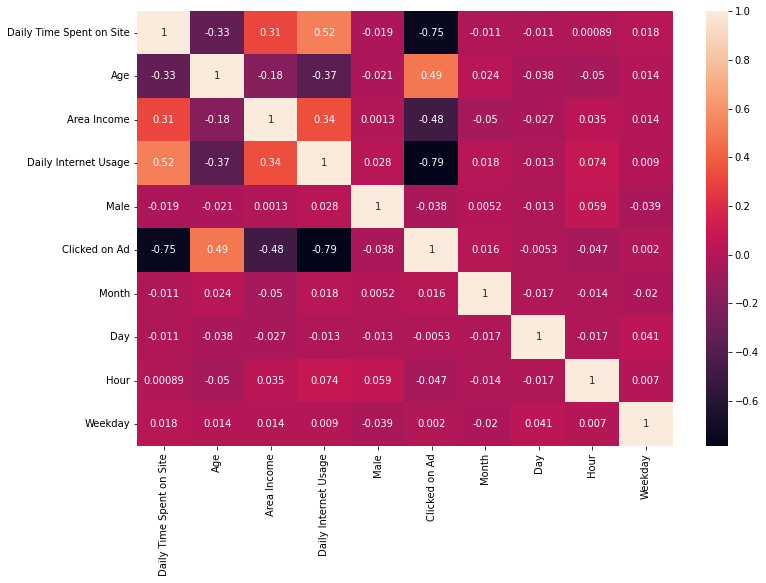

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True)

***We expect daily internet usage and daily time spent on site to be more correlated with our target variable. Also, none of our explantory variables seems to correlate with each other which indicates there is no collinearity in our data.***

**Extracted Features Visualizations:**

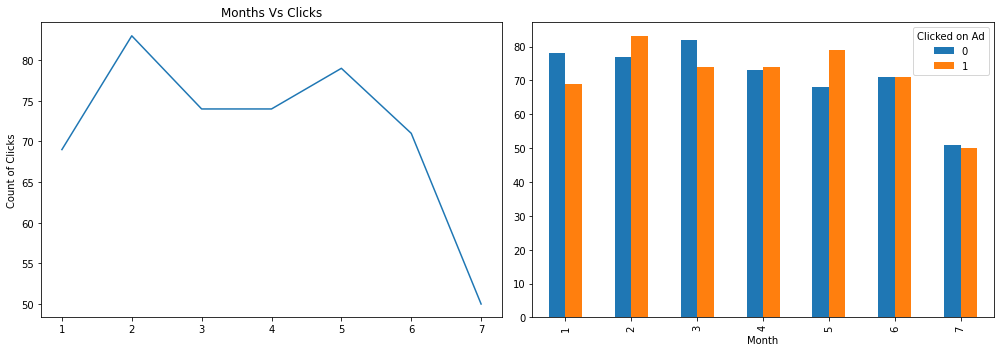

In [23]:
f,ax=plt.subplots(1,2,figsize=(14,5))
data['Month'][data['Clicked on Ad']==1].value_counts().sort_index().plot(ax=ax[0])
ax[0].set_title('Months Vs Clicks')
ax[0].set_ylabel('Count of Clicks')
pd.crosstab(data["Clicked on Ad"], data["Month"]).T.plot(kind = 'bar',ax=ax[1])

plt.tight_layout()
plt.show()

Line chart showing the count of clicks for each month. 

Grouped bar chart shows distribution of target variable across 7 months. 

***2nd Month seems to be the best for clicking on a Ad.***

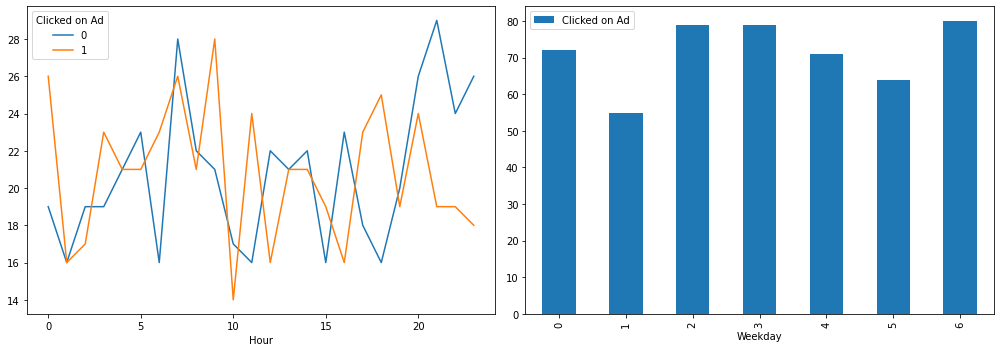

In [25]:
f,ax=plt.subplots(1,2,figsize=(14,5))
pd.crosstab(data["Clicked on Ad"], data["Hour"]).T.plot(style = [], ax = ax[0])
pd.pivot_table(data, index = ['Weekday'], values = ['Clicked on Ad'],aggfunc= np.sum).plot(kind = 'bar', ax=ax[1]) # 0 - Monday
plt.tight_layout()
plt.show()

***Line chart here indicates that user tends to click on a Ad later in a day or probably early in the morning. It is expected based on the age feature that most people are working so it seems appropriate as they either find time early or late in the day. Also sunday seems to be effective for clicking on a ad from the bar chart.***

**Clicked Vs Not Clicked**

In [27]:
data.groupby('Clicked on Ad')['Clicked on Ad', 'Daily Time Spent on Site', 'Age', 'Area Income', 
                            'Daily Internet Usage'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Clicked on Ad,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Clicked on Ad,,,,,
0,0.0,76.85462,31.684,61385.58642,214.51374
1,1.0,53.14578,40.334,48614.41374,145.48646


* ***On average, the users who spend about 76.85 min daily on the site, are the age of 31, have an income of 61,385, and have a daily internet usage of 214.5 did not click on the ad.***

* ***On average, the users who spend about 53.14 min daily on the site, are the age of 40, have an income of 48,614 , and have a daily internet usage of 145.48 did click on the ad.***

In [28]:
data.groupby(['Male','Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad,0,1
Male,,
0,250,269
1,250,231


***Distribution of clicks by gender. It seems that more number of females have clicked on ad.***

In [30]:
hdf = pd.pivot_table(data, index = ['Hour'], columns = ['Male'], values = ['Clicked on Ad'], 
                     aggfunc= np.sum).rename(columns = {'Clicked on Ad':'Clicked'})

cm = sns.light_palette("green", as_cmap=True)
hdf.style.background_gradient(cmap=cm)  # Sums all 1's i.e clicked for each hour

***Distribution by each hour and by gender. Overall females tend to click on a Ad more often than males.***

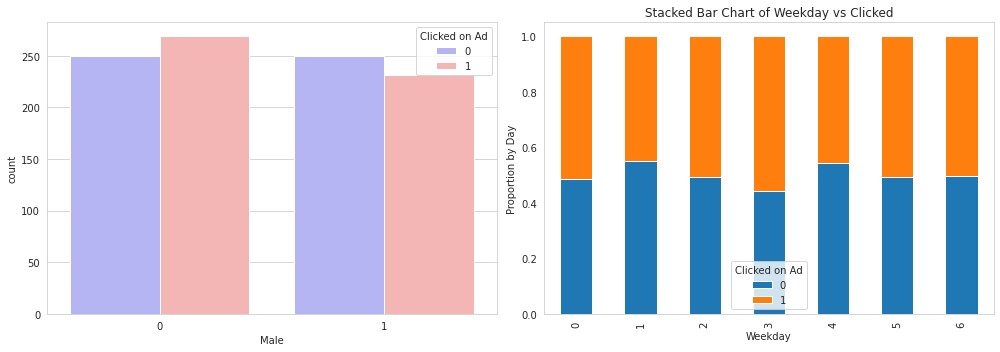

In [32]:
f,ax=plt.subplots(1,2,figsize=(14,5))
sns.set_style('whitegrid')
sns.countplot(x='Male',hue='Clicked on Ad',data=data,palette='bwr', ax = ax[0]) # Overall distribution of Males and females count
table = pd.crosstab(data['Weekday'],data['Clicked on Ad'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax[1], grid = False) # 0 - Monday
ax[1].set_title('Stacked Bar Chart of Weekday vs Clicked')
ax[1].set_ylabel('Proportion by Day')
ax[1].set_xlabel('Weekday')
plt.tight_layout()
plt.show()

* ***According to the chart on the left, more females clicked on the ad than males.***

* ***Then, the chart on the right shows that there are more chances of a user clicking the ad on a Thursday.***

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


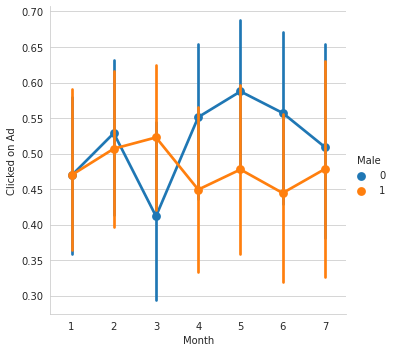

In [33]:
sns.factorplot('Month', 'Clicked on Ad', hue='Male', data = data)
plt.show()

***Females are more likely to click on an ad in May, while Males are likely to click on an ad in March***

**Basic model building based on the actual data**

In [34]:
# Importing train_test_split from sklearn.model_selection family
from sklearn.model_selection import train_test_split

In [35]:
# Assigning Numerical columns to X & y only as model can only take numbers
X = data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = data['Clicked on Ad']

In [36]:
# Splitting the data into train & test sets 
# test_size is % of data that we want to allocate & random_state ensures a specific set of random splits on our data because 
#this train test split is going to occur randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

# We dont have to use stratify method in train_tst_split to handle class distribution as its not imbalanced and does contain equal number of classes i.e 1's and 0's
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(670, 5) (670,)
(330, 5) (330,)


In [37]:
# Import LogisticRegression from sklearn.linear_model family
from sklearn.linear_model import LogisticRegression

In [38]:
# Instantiate an instance of the linear regression model (Creating a linear regression object)
logreg = LogisticRegression()

# Fit the model on training data using a fit method
model = logreg.fit(X_train,y_train)
model

LogisticRegression()

**Predictions**

In [39]:
# The predict method just takes X_test as a parameter, which means it just takes the features to draw predictions
predictions = logreg.predict(X_test)

# Below are the results of predicted click on Ads
predictions[0:20]

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

**Performance Metrics**

Now we need to see how far our predictions met the actual test data (y_test) by performing evaluations using classification report & confusion matrix on the target variable and the predictions.

In [40]:
# Importing classification_report from sklearn.metrics family
from sklearn.metrics import classification_report

# Printing classification_report to see the results
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [41]:
# Importing a pure confusion matrix from sklearn.metrics family
from sklearn.metrics import confusion_matrix

# Printing the confusion_matrix
print(confusion_matrix(y_test, predictions))

[[156   6]
 [ 25 143]]


**Note for Confusion Matrix**

1st row is Actual No & 2nd row is Actual Yes

156 is a True Negative meaning the proportion of negatives that are correctly identified.

6 is a False Positive where we predict a result that is actually doesn't fulfill.

25 is a False Negative where the prediction failed, when it was actually successful.

143 is a True Positive that shows where the proportion of positives that are correctuly identified.

**Results for Basic Model**

The results from evaluation are as follows:

**Confusion Matrix:**

The users that are predicted to click on commercials and the actually clicked users were 143, the people who were predicted not to click on the commercials and actually did not click on them were 156.

The people who were predicted to click on commercial and actually did not click on them are 6, and the users who were not predicted to click on the commercials and actually clicked on them are 25.

We have only a few mislabelled points which is not bad from the given size of the dataset.

**Classification Report:**

From the report obtained, the precision & recall are 0.91 which depicts the predicted values are 91% accurate. Hence the probability that the user can click on the commercial is 0.91 which is a good precision value to get a good model.

**Feature Engineering**

In [42]:
new_data = data.copy() # just to keep the original dataframe unchanged

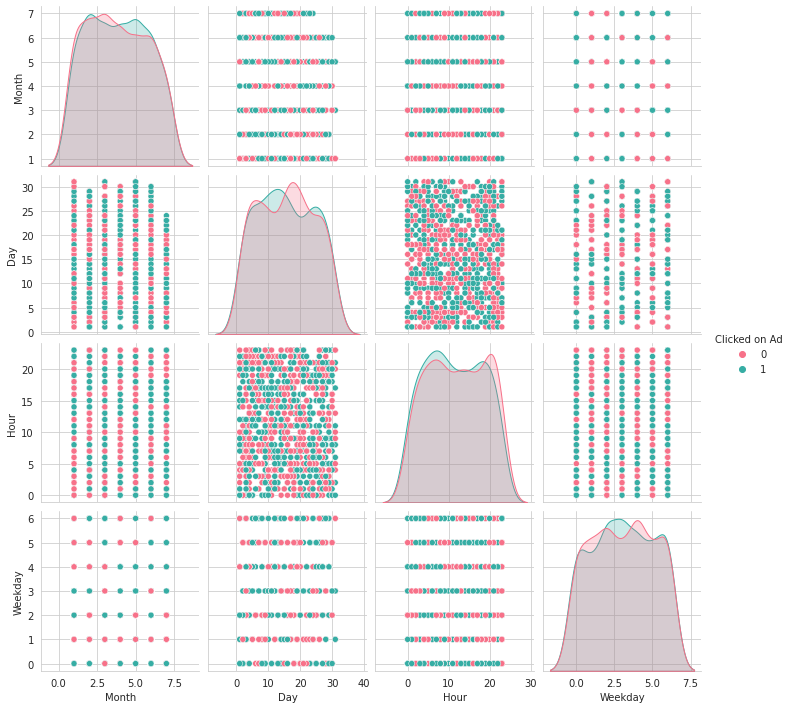

In [44]:
# Creating pairplot to check effect of datetime variables on target variable (variables which were created)
pp = sns.pairplot(new_data, hue= 'Clicked on Ad', vars = ['Month', 'Day', 'Hour', 'Weekday'], palette= 'husl')

***There dont seems to be any effect of month, day, weekday and hour on the target variable.***

In [45]:
# Dummy encoding on Month column
new_data = pd.concat([new_data, pd.get_dummies(new_data['Month'], prefix='Month')], axis=1)

# Dummy encoding on weekday column
new_data = pd.concat([new_data, pd.get_dummies(new_data['Weekday'], prefix='Weekday')], axis=1)

In [47]:
# Creating buckets for hour columns based on EDA part
new_data['Hour_bins'] = pd.cut(new_data['Hour'], bins = [0, 5, 11, 17, 23], 
                        labels = ['Hour_0-5', 'Hour_6-11', 'Hour_12-17', 'Hour_18-23'], include_lowest= True)

In [48]:
# Dummy encoding on Hour_bins column
new_data = pd.concat([new_data, pd.get_dummies(new_data['Hour_bins'], prefix='Hour')], axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text major ticklabel objects>)

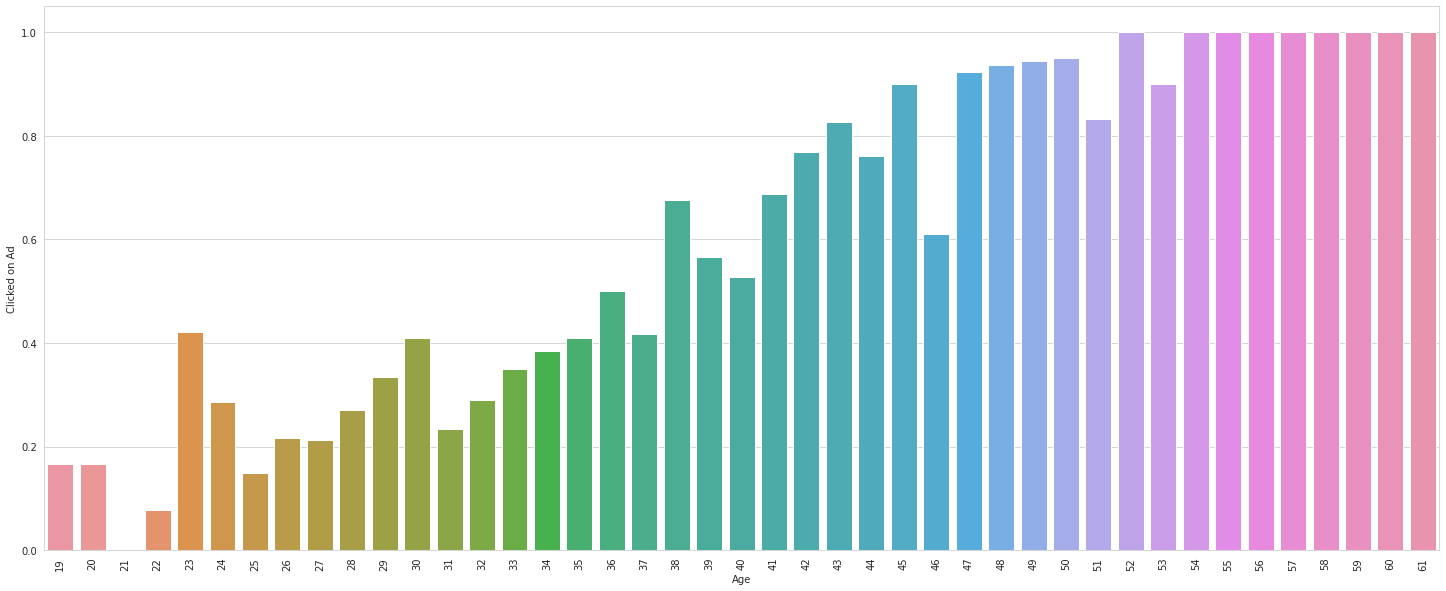

In [50]:
# Feature engineering on Age column
plt.figure(figsize=(25,10))
sns.barplot(new_data['Age'],data['Clicked on Ad'], ci=None)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text major ticklabel objects>)

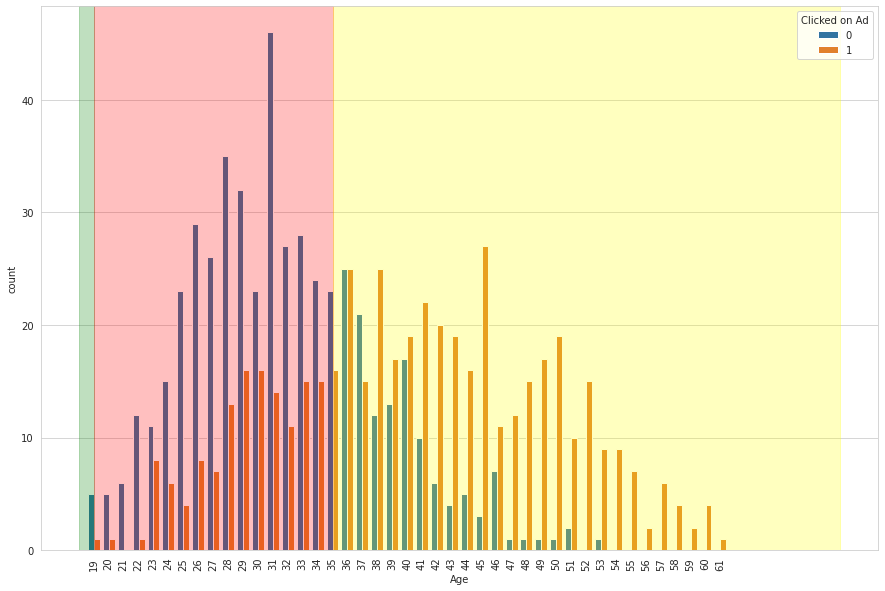

In [51]:
# checking bins
limit_1 = 18
limit_2 = 35

x_limit_1 = np.size(data[data['Age'] < limit_1]['Age'].unique())
x_limit_2 = np.size(data[data['Age'] < limit_2]['Age'].unique())

plt.figure(figsize=(15,10))
#sns.barplot(data['age'],data['survival_7_years'], ci=None)
sns.countplot('Age',hue='Clicked on Ad',data=data)
plt.axvspan(-1, x_limit_1, alpha=0.25, color='green')
plt.axvspan(x_limit_1, x_limit_2, alpha=0.25, color='red')
plt.axvspan(x_limit_2, 50, alpha=0.25, color='yellow')

plt.xticks(rotation=90)

In [52]:
# Creating Bins on Age column based on above plots
new_data['Age_bins'] = pd.cut(new_data['Age'], bins=[0, 18, 30, 45, 70], labels=['Young','Adult','Mid', 'Elder'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


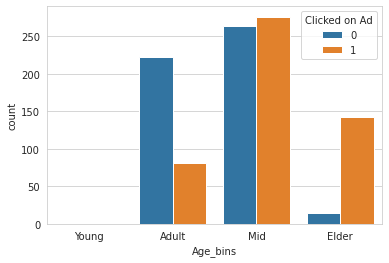

In [53]:
sns.countplot('Age_bins',hue='Clicked on Ad',data= new_data) # Verifying the bins by checking the count

In [54]:
# Dummy encoding on Age column
new_data = pd.concat([new_data, pd.get_dummies(new_data['Age_bins'], prefix='Age')], axis=1) 

In [55]:
# Dummy encoding on Column column based on EDA
new_data = pd.concat([new_data, pd.get_dummies(new_data['Country'], prefix='Country')], axis=1)

In [56]:
# Remove redundant and no predictive power features
new_data.drop(['Country', 'Ad Topic Line', 'City', 'Day', 'Month', 'Weekday', 
             'Hour', 'Hour_bins', 'Age', 'Age_bins'], axis = 1, inplace = True)

new_data.head() # Checking the final dataframe

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Hour_Hour_0-5,Hour_Hour_6-11,Hour_Hour_12-17,Hour_Hour_18-23,Age_Young,Age_Adult,Age_Mid,Age_Elder,Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,Country_Angola,Country_Anguilla,Country_Antarctica (the territory South of 60 deg S),Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Aruba,Country_Australia,...,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Svalbard & Jan Mayen Islands,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Taiwan,Country_Tajikistan,Country_Tanzania,Country_Thailand,Country_Timor-Leste,Country_Togo,Country_Tokelau,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Turks and Caicos Islands,Country_Tuvalu,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States Minor Outlying Islands,Country_United States Virgin Islands,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,68.95,61833.90,256.09,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,80.23,68441.85,193.77,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,69.47,59785.94,236.50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,74.15,54806.18,245.89,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,68.37,73889.99,225.58,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Building Logistic Regression Model**

In [57]:
X = new_data.drop(['Clicked on Ad'],1)
y = new_data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [58]:
# Standarizing the features
from  sklearn.preprocessing  import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 263) (800,)
(200, 263) (200,)


In [59]:
import  statsmodels.api  as sm
from scipy import stats

X2   = sm.add_constant(X_train_std)
est  = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Clicked on Ad   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     17.75
Date:                Wed, 24 Nov 2021   Prob (F-statistic):          8.68e-164
Time:                        01:57:42   Log-Likelihood:                 314.62
No. Observations:                 800   AIC:                            -115.2
Df Residuals:                     543   BIC:                             1089.
Df Model:                         256                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4863      0.007     69.390      0.0

***We can see that the feature Male(Gender) does not contribute to the model (i.e., see x4 since the P-value is >= .05) so we can actually remove that variable from our model.***

After removing the variable if the Adjusted R-squared has not changed from the previous model. Then we could conclude that the feature indeed was not contributing to the model. 

**Looks like the contributing features for the model are (P-value < .05):**

* Daily Time Spent on site
* Daily Internet Usage
* Age
* Country
* Area income

In [61]:
from sklearn.metrics import accuracy_score

# Applying logistic regression model to training data
lr = LogisticRegression(penalty="l2", C= 0.1, random_state=42)
lr.fit(X_train_std, y_train)

# Predict using model
lr_training_pred = lr.predict(X_train_std)
lr_training_prediction = accuracy_score(y_train, lr_training_pred)

print( "Accuracy of Logistic regression training set:",   round(lr_training_prediction,3))

Accuracy of Logistic regression training set: 0.992


In [62]:
#Creating K fold Cross-validation 
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lr, # model
                         X_train_std, # Feature matrix
                         y_train, # Target vector
                         cv=kf, # Cross-validation technique
                         scoring="accuracy", # Loss function
                         n_jobs=-1) # Use all CPU scores
print('10 fold CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

10 fold CV accuracy: 0.956 +/- 0.022


The cross validated score for Logistic Regression Classifier is: 95.62


Text(0.5, 1.05, 'Confusion_matrix')

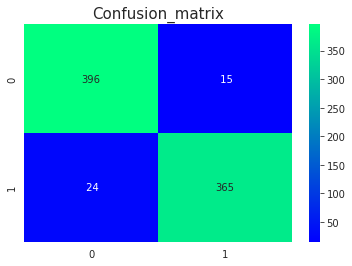

In [63]:
from sklearn.model_selection import cross_val_predict
print('The cross validated score for Logistic Regression Classifier is:',round(scores.mean()*100,2))
y_pred = cross_val_predict(lr,X_train_std,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="winter")
plt.title('Confusion_matrix', y=1.05, size=15)

**Random Forest Model**

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', n_estimators=400,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=42,n_jobs=-1)
rf.fit(X_train_std,y_train)
# Predict using model
rf_training_pred = rf.predict(X_train_std)
rf_training_prediction = accuracy_score(y_train, rf_training_pred)

print("Accuracy of Random Forest training set:",   round(rf_training_prediction,3))

Accuracy of Random Forest training set: 0.994


In [65]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rf, # model
                         X_train_std, # Feature matrix
                         y_train, # Target vector
                         cv=kf, # Cross-validation technique
                         scoring="accuracy", # Loss function
                         n_jobs=-1) # Use all CPU scores
print('10 fold CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

10 fold CV accuracy: 0.966 +/- 0.013


The cross validated score for Random Forest Classifier is: 96.62


Text(0.5, 1.05, 'Confusion_matrix')

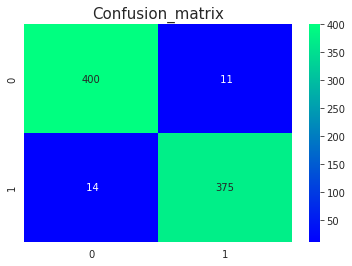

In [66]:
from sklearn.model_selection import cross_val_predict
print('The cross validated score for Random Forest Classifier is:',round(scores.mean()*100,2))
y_pred = cross_val_predict(rf,X_train_std,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="winter")
plt.title('Confusion_matrix', y=1.05, size=15)

**Test Model Performance**

In [68]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lr.predict(X_test_std))

print ("Logistic Regression AUC = %2.2f" % lr_auc)
print(classification_report(y_test, lr.predict(X_test_std)))

print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test_std))

print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test_std)))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.91
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        89
           1       0.97      0.86      0.91       111

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200



 ---Random Forest Model---
Random Forest AUC = 0.94
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        89
           1       0.94      0.95      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



***We can observe that random forest has higher accuracy compared to logistic regression model in both test and train data sets.***

**Random Forest Feature Importances**

In [69]:
columns = X.columns
train = pd.DataFrame(np.atleast_2d(X_train_std), columns=columns) # Converting numpy array list into dataframes

In [70]:
# Get Feature Importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances.head(10)

,index,importance
0,Daily Internet Usage,0.363155
1,Daily Time Spent on Site,0.283201
2,Area Income,0.113893
3,Age_Elder,0.039546
4,Age_Adult,0.028179
5,Age_Mid,0.008104
6,Country_Hungary,0.003655
7,Male,0.003080
8,Hour_Hour_6-11,0.003060
9,Country_Australia,0.002839


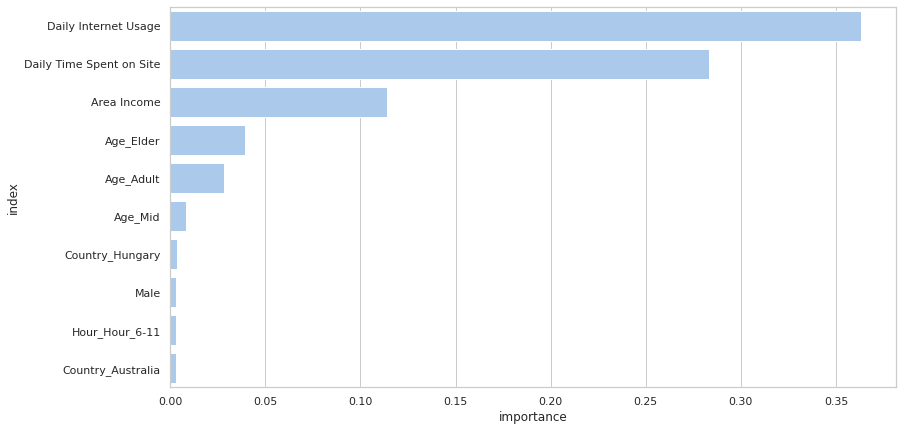

In [71]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the Feature Importance
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances[0:10],
            label="Total", color="b")

**Recommendations**

Above are the dominant features our model is predicting so our target population are the people:

* Who Spends less time on the internet
* Who spends less time on the website
* Who has lower income
* Who are older than our average sample (mean around 40 years old)